# 📘 Day 06: Math Behind Linear & Logistic Regression
Understand the core mathematical foundations behind two fundamental supervised learning algorithms.

## 🔢 Linear Regression - Intuition
Linear regression models the relationship between input features and a continuous target variable as a straight line:

**y = w·x + b**

Where:
- `w` is the weight (slope)
- `x` is the input feature
- `b` is the bias (intercept)

## 🧮 Linear Regression - Cost Function (MSE)
The model is trained by minimizing the **Mean Squared Error (MSE)**:

**MSE = (1/n) * Σ(y_pred - y_actual)²**

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Simulated data
X = np.linspace(0, 10, 50)
X

array([ 0.        ,  0.20408163,  0.40816327,  0.6122449 ,  0.81632653,
        1.02040816,  1.2244898 ,  1.42857143,  1.63265306,  1.83673469,
        2.04081633,  2.24489796,  2.44897959,  2.65306122,  2.85714286,
        3.06122449,  3.26530612,  3.46938776,  3.67346939,  3.87755102,
        4.08163265,  4.28571429,  4.48979592,  4.69387755,  4.89795918,
        5.10204082,  5.30612245,  5.51020408,  5.71428571,  5.91836735,
        6.12244898,  6.32653061,  6.53061224,  6.73469388,  6.93877551,
        7.14285714,  7.34693878,  7.55102041,  7.75510204,  7.95918367,
        8.16326531,  8.36734694,  8.57142857,  8.7755102 ,  8.97959184,
        9.18367347,  9.3877551 ,  9.59183673,  9.79591837, 10.        ])

In [15]:
y = 2.5 *0.2 +4 + np.random.randn(50)
y

array([2.91401669, 2.62007561, 6.37096518, 4.88961418, 3.63170727,
       5.03462909, 1.86425226, 4.50337551, 4.82782117, 5.42427014,
       3.48610405, 4.58568716, 3.57457537, 4.75538376, 3.60465368,
       4.09189916, 3.50418461, 5.15113624, 5.35845112, 4.26537943,
       4.53823799, 3.05140859, 4.20032335, 4.44979538, 7.12079309,
       3.38803297, 5.96417724, 5.49685877, 4.7806364 , 6.25862048,
       4.87210547, 4.8891592 , 4.44687935, 5.72356888, 5.59646923,
       3.87432271, 3.18075281, 4.29701936, 3.69996144, 4.43647543,
       5.73743813, 4.04269834, 4.45717662, 4.55802273, 5.34843088,
       2.25311067, 3.89329971, 4.71128369, 5.70007896, 4.00809755])

MSE: 1.1631198735843842


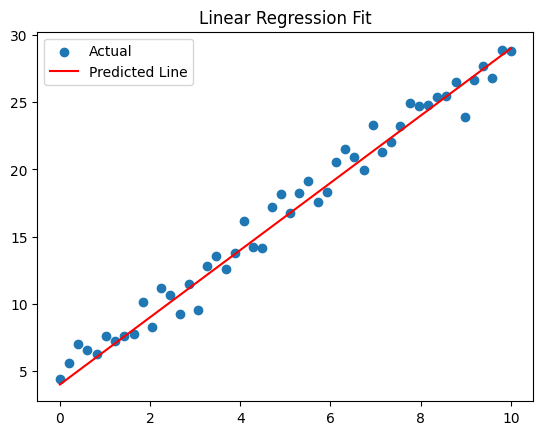

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Simulated data
X = np.linspace(0, 10, 50)

y = 2.5 * X + 4 + np.random.randn(50)

# Prediction with random weights
w, b = 2.5, 4
y_pred = w * X + b

# y = wx + b

# MSE
mse = np.mean((y - y_pred)**2)
print("MSE:", mse)

# Plot
plt.scatter(X, y, label="Actual")
plt.plot(X, y_pred, color="red", label="Predicted Line")
plt.title("Linear Regression Fit")
plt.legend()
plt.show()

Multilinear MSE: 24.16745954315521


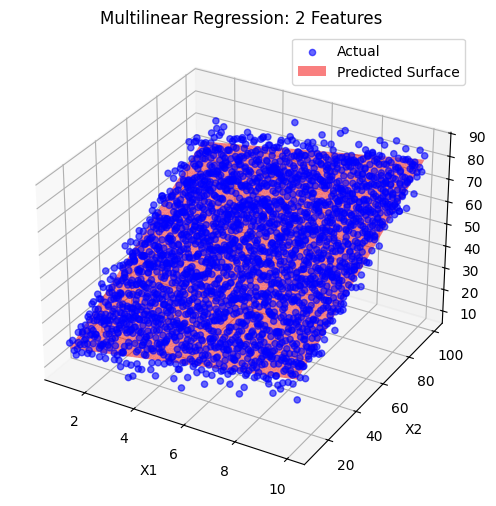

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate input features
np.random.seed(42)
X1 = np.linspace(1, 10, 50)
X2 = np.linspace(10, 100, 50)
X1, X2 = np.meshgrid(X1, X2)
X1 = X1.ravel()
X2 = X2.ravel()

# True weights and bias
w1, w2, b = 2.0, 0.5, 10

# Generate output with noise
y = w1 * X1 + w2 * X2 + b + np.random.randn(len(X1)) * 5

# y = w1 * X1 + w2 * X2 + b 

# Prediction (simulated perfect model)
y_pred = w1 * X1 + w2 * X2 + b

# MSE
mse = np.mean((y - y_pred) ** 2)
print("Multilinear MSE:", mse)

# 3D Visualization
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X1, X2, y, label='Actual', color='blue', alpha=0.6)
ax.plot_trisurf(X1, X2, y_pred, color='red', alpha=0.5, label='Predicted Surface')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('y')
ax.set_title('Multilinear Regression: 2 Features')
plt.legend()
plt.show()


## 📉 Logistic Regression - Intuition
Used for **binary classification**, logistic regression models the probability that an instance belongs to class 1 using the **sigmoid function**:

**σ(z) = 1 / (1 + e^(-z))**  where `z = w·x + b`

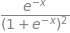

In [19]:
import sympy as sp
sp.init_printing()

x = sp.symbols('x')
sigmoid = 1 / (1 + sp.exp(-x))
display(sigmoid)
display(sp.diff(sigmoid, x))

## 📐 Logistic Loss (Binary Cross Entropy)
The loss function used in logistic regression is:

**Loss = -[y·log(p) + (1-y)·log(1-p)]**

Where:
- `y` is the true label (0 or 1)
- `p` is the predicted probability

In [ ]:
y = 0,1
p = 0.8,0.2

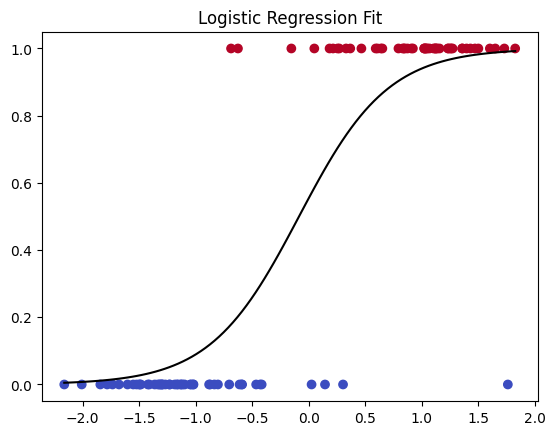

In [20]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

X, y = make_classification(n_samples=100, n_features=1, n_informative=1,
                           n_redundant=0, n_clusters_per_class=1, flip_y=0.05)

model = LogisticRegression()
model.fit(X, y)

plt.scatter(X, y, c=y, cmap='coolwarm')
x_vals = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_probs = model.predict_proba(x_vals)[:, 1]
plt.plot(x_vals, y_probs, color='black')
plt.title("Logistic Regression Fit")
plt.show()

# 📘 Types of Regression & When to Use Them

| Regression Type               | Description                                                | Best Used When...                                       |
|------------------------------|------------------------------------------------------------|----------------------------------------------------------|
| **Linear Regression**         | Fits a straight-line relationship                         | Data has a linear trend                                  |
| **Polynomial Regression**     | Fits curved trends using polynomial terms                 | Data shows non-linear patterns                           |
| **Ridge Regression (L2)**     | Penalizes large coefficients to reduce overfitting        | Multicollinearity is present                             |
| **Lasso Regression (L1)**     | Shrinks less important coefficients to zero               | You want feature selection in high-dimensional data      |
| **Elastic Net**               | Combines L1 and L2 regularization                         | You want both feature selection and coefficient shrinkage|
| **Logistic Regression**       | Classifies binary/multi-class targets using sigmoid       | Target is categorical (classification tasks)             |
| **Quantile Regression**       | Predicts specific quantiles like median                   | Data has skew or you need robust predictions             |
| **Robust Regression**         | Less sensitive to outliers                               | Data contains outliers or noise                          |
| **Bayesian Regression**       | Includes uncertainty with probability distributions       | Probabilistic modeling or uncertainty is important       |
| **Stepwise Regression**       | Automatically selects significant features                | Simplifying models with relevant variables               |
| **Support Vector Regression** | Uses margins to fit regression boundaries                 | High-dimensional, non-linear regression tasks            |
| **Decision Tree Regression**  | Splits data based on feature thresholds                   | Interpretable models with non-linear splits              |
| **Random Forest Regression**  | Ensemble of trees reduces variance                        | Complex relationships, higher accuracy needed            |
| **Gradient Boosting**         | Sequentially improves model using weak learners           | Best performance on structured/tabular data              |


## ✅ Summary
- Linear regression minimizes squared error to fit a line to data.
- Logistic regression uses sigmoid to predict probabilities.
- Understanding cost functions and gradients helps interpret model behavior and training.